

# Project: Noshow in Brazilian Hospitals, investigating possible reasons among age, sms-recieved, & scholarship.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


No shows are one of the major problems for the healthcare organizations across Brazil. Missed appointments adversely affect the providers, staffs, patients and the healthcare system itself. 
Missed appointments represent a significant risk marker for all-cause mortality. Future interventions should be developed with a particular focus on increasing attendance by these patients.


### Question(s) for Analysis

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
In this report we will investigate the relation between age, scholarship,  sms-recieved and the noshow rate.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
% matplotlib inline



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(url)
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

The sample size is 110527 with 14 attributes. These attributes (columns)are as follows:
        1) Patient ID: this is the ID of the patient in the hospital.
        2) Appointment ID: this is the ID of the appointment generated automatically by the system.
        3) Scolarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
        4) Scheduled Day: tells us on what day the patient set up their appointment.
        5) Neighborhood: indicates the location of the hospital.
        6) Age: age of the patient.
        7) Hypertension: states whether the patient is hypertensive or not.
        8) Diabetes: states whether the patient is diabetic or not. 
        9) Alcoholism: states whether the patient is alcoholic or not.
        10) Handicap: states whether the patient is handiacapped or not.
        11)SMS recieved: states whether the patient recieved as sms for the appointment or not.
        12) Gender: states the gender of the patient.
        13) No show: states the noshow status.
        14) Appointment date


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 The mean age is 37. The mean scholarship is 0.09. Since the scholarship takes values of 0 or 1 only, then once the mean is less than 0.1 this means that the majority of patients are not enrolled in Brasilian welfare program Bolsa Família. The values of 0 & 1 are applicable to hypertension, diabetes, alcohlicm, handicapped, & sms recieved. Where 0 means no, while 1 means yes. Hypertensive patients mean is 0.2. Diabetes meanis 0.07. Alcoholism mean is 0.03. This means that we have low percent of hypertensive patients, diabetic pateints & the least is alcoholism. Handicapped mean is only 0.02. only less than half of the pateints recieve sms to remind them for their appointment.
 
Minimum age is -1 which is not applicable this means that there is error in this value. Minimum age is to replaced with the mean age.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Upon wrangling the data, all columns have 110527 non-null values,therefore is no nan values. scehduled day & appointment day are strings. They must be converted to date format.

Delete extra colums that are not needed.

In [7]:
df.drop(['PatientId','AppointmentID','Neighbourhood','ScheduledDay'],axis=1 ,inplace=True)
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No



### Data Cleaning

 

As the minimum value of age is:-1 which is no applicable, then this value must be replaced with the mean.
To know the index of the cell having the minimum value of age (-1). Then, to replace this value with the mean.

In [9]:
df['Age'].idxmin()


99832

In [10]:
df.loc[99832,'Age']=df['Age'].mean()
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.089219,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.109921,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Changing the appointment date format from object (string) to date format.

In [11]:
# to change the date format from object (string) to date format
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,62.0,0,1,0,0,0,0,No
1,M,2016-04-29,56.0,0,0,0,0,0,0,No
2,F,2016-04-29,62.0,0,0,0,0,0,0,No
3,F,2016-04-29,8.0,0,0,0,0,0,0,No
4,F,2016-04-29,56.0,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Does the age has a role to change the no-show rate?

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


Does the age of the patient has a role in noshow?

In [13]:
df.columns

Index(['Gender', 'AppointmentDay', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [14]:
df_no=df[df['No-show']=='No']
df_no.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,62.0,0,1,0,0,0,0,No
1,M,2016-04-29,56.0,0,0,0,0,0,0,No
2,F,2016-04-29,62.0,0,0,0,0,0,0,No
3,F,2016-04-29,8.0,0,0,0,0,0,0,No
4,F,2016-04-29,56.0,0,1,1,0,0,0,No


In [15]:
mask=df['No-show']=='No'
df_no=df[mask]
df_no

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,62.0,0,1,0,0,0,0,No
1,M,2016-04-29,56.0,0,0,0,0,0,0,No
2,F,2016-04-29,62.0,0,0,0,0,0,0,No
3,F,2016-04-29,8.0,0,0,0,0,0,0,No
4,F,2016-04-29,56.0,0,1,1,0,0,0,No
5,F,2016-04-29,76.0,0,1,0,0,0,0,No
8,F,2016-04-29,21.0,0,0,0,0,0,0,No
9,F,2016-04-29,19.0,0,0,0,0,0,0,No
10,F,2016-04-29,30.0,0,0,0,0,0,0,No
12,F,2016-04-29,22.0,1,0,0,0,0,0,No


In [16]:
df_no['Age'].describe()

count    88208.000000
mean        37.790496
std         23.338513
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [17]:
df_yes=df[df['No-show']=='Yes']
df_yes.head()

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,F,2016-04-29,23.0,0,0,0,0,0,0,Yes
7,F,2016-04-29,39.0,0,0,0,0,0,0,Yes
11,M,2016-04-29,29.0,0,0,0,0,0,1,Yes
17,F,2016-04-29,40.0,1,0,0,0,0,0,Yes
20,F,2016-04-29,30.0,0,0,0,0,0,0,Yes


In [18]:
mask=df['No-show']=='Yes'
df_yes=df[mask]
df_yes

,Gender,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,F,2016-04-29,23.0,0,0,0,0,0,0,Yes
7,F,2016-04-29,39.0,0,0,0,0,0,0,Yes
11,M,2016-04-29,29.0,0,0,0,0,0,1,Yes
17,F,2016-04-29,40.0,1,0,0,0,0,0,Yes
20,F,2016-04-29,30.0,0,0,0,0,0,0,Yes
21,F,2016-04-29,4.0,0,0,0,0,0,0,Yes
22,M,2016-04-29,13.0,0,0,0,0,0,1,Yes
31,M,2016-04-29,12.0,1,0,0,0,0,0,Yes
44,F,2016-04-29,78.0,0,1,1,0,0,0,Yes
48,F,2016-04-29,58.0,0,0,0,0,0,1,Yes


In [49]:
df_yes['Age'].mean()

34.317666562121957

In [50]:
df_no['Age'].mean()

37.790496200732491

No. of noshows are 22319 while patients who attend thier appointment are 88028.Mean age of patients who don't attend thier appointments are lower than that of patients who attend, (34.3, 37.8) respectively. The difference is not that big therefore, age has nothing to do with noshow percentage.

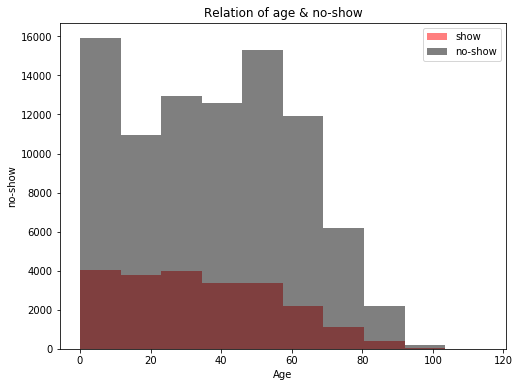

In [39]:
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(df_yes['Age'], alpha=0.5, label='show', color='red')
ax.hist(df_no['Age'], alpha=0.5, label='no-show', color='black')
ax.set_title('Relation of age & no-show')
ax.set_xlabel('Age')
ax.set_ylabel('no-show')
ax.legend(loc='upper right')
plt.show;

It seems from the graph that both no-show & show are alike. Therefore, it is clear that age is not a factor that affect the no-show percentage.

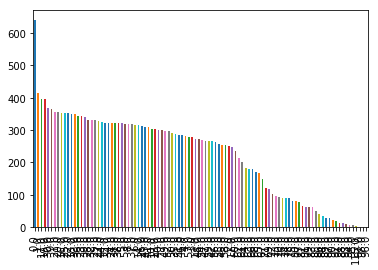

In [68]:
df_yes['Age'].value_counts().plot(kind='bar');

### Research Question 2: Effect of sending an sms on the no-show percentage.

Does sending an sms reminder to patients decrease the no-show percentage?

In [69]:
# just to copy & paste the column name correctly
df.columns

Index(['Gender', 'AppointmentDay', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [47]:
df_yes['SMS_received'].mean()

0.43837089475334917

In [48]:
df_no['SMS_received'].mean()

0.29133411935425357

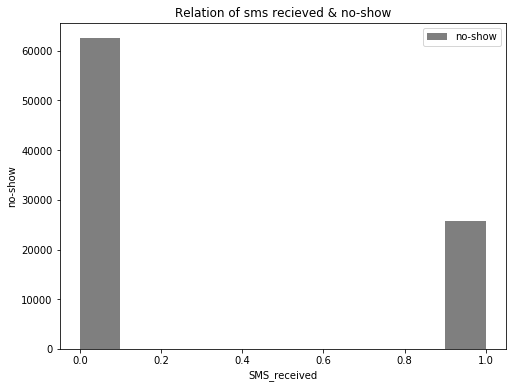

In [41]:
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(df_no['SMS_received'], alpha=0.5, label='no-show', color='black')
ax.set_title('Relation of sms recieved & no-show')
ax.set_xlabel('SMS_received')
ax.set_ylabel('no-show')
ax.legend(loc='upper right')
plt.show;

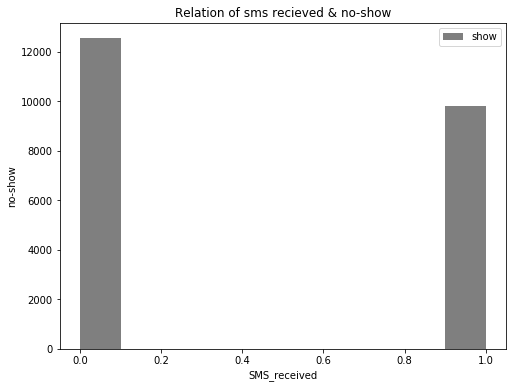

In [42]:
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(df_yes['SMS_received'], alpha=0.5, label='show', color='black')
ax.set_title('Relation of sms recieved & no-show')
ax.set_xlabel('SMS_received')
ax.set_ylabel('no-show')
ax.legend(loc='upper right')
plt.show;

It is clear from the graph that recieving sms decreases the noshow rate is markedly decreasesd by recieving an sms reminder.

Research Question 3: Investigating the role of scholarship in noshow percentage

In [58]:
df_yes['Scholarship'].mean()

0.11550696715802679

In [59]:
df_no['Scholarship'].mean()

0.093903047342644652

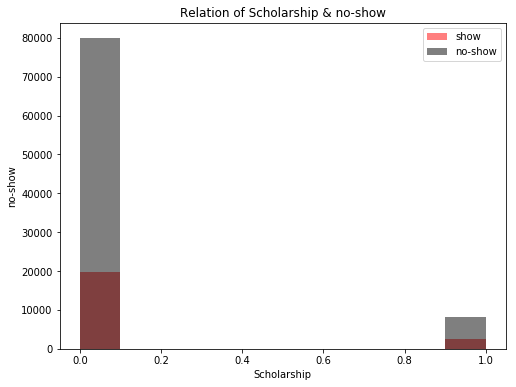

In [46]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(df_yes['Scholarship'], alpha=0.5, label='show', color='red')
ax.hist(df_no['Scholarship'], alpha=0.5, label='no-show', color='black')
ax.set_title('Relation of Scholarship & no-show')
ax.set_xlabel('Scholarship')
ax.set_ylabel('no-show')
ax.legend(loc='upper right')
plt.show;

It is clear from the graph that patients who don't have scholarship have a no-show rate much higher than that who have a scholarship.

Conclusion:
Noshow at hospitals costs a lot of money every year.  A missed appointment is more than just a missed opportunity. When a patient doesn’t show up on time, it also affects people who could’ve been treated instead of that patient. Therefore, investigations must be done to know the main reasons behind the noshow phenomena.
It is supposed that older pateints will have more noshow percenatges. But according to the findings, age has no role with noshow percentage, even though the mean age is lower in patients who didn't catch thier appointment.
Many hospitals are sending sms to thier patients as a reminder for thier appointments. Sms messages decrease the noshow percentage, thus sms messages benefit the hospitals as they decrease the noshow percentage.
Patients who has scholarship attend more than those who don't have such scholarship. Thus, increasing scholarship will decrease the noshow rate.

Limitations:
The neighborhood: The data here has the neighborhood where is the hospital is. It is better to have the average distance between the patient's home & the hospital. The distance between the home & the distance may affect the noshow rate. As the larger the distance, the higher the noshow percentage.



In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0